In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import f_oneway
import datetime
import sklearn
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_store= pd.read_csv('store.csv')
df_test= pd.read_csv('test.csv')
df_train= pd.read_csv('train.csv',parse_dates=True,low_memory=False,index_col='Date')

In [3]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
df_store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [5]:
df_store.shape

(1115, 10)

In [6]:
df_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [7]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [8]:
df_store.isnull().values.any()

True

In [9]:
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [11]:
#Filling these 3 missing values with the average of the column
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].mean(), inplace = True)

In [12]:
#filling the rest of the values with 0
df_store.fillna(0, inplace = True)

In [13]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [14]:
df_train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [15]:
df_train.dtypes

Store             int64
DayOfWeek         int64
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [16]:
train.shape

NameError: name 'train' is not defined

In [17]:
df_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [19]:
df_train.isnull().values.any()

False

In [20]:
df_train.isnull().sum()

Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [21]:
#date extraction
df_train['Year']=df_train.index.year
df_train['Month']=df_train.index.month
df_train['Week']=df_train.index.week


<ipython-input-21-cf25a16e7b57>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_train['Week']=df_train.index.week


In [22]:
#Sales per customer helps retailers monitor
#the average purchase basket
df_train['SalesperCustomer']=df_train['Sales']/df_train['Customers'] 

In [23]:
df_train

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,SalesperCustomer
Date,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,9.482883
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,9.702400
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,10.126675
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,9.342457
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,8.626118
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,1111,2,0,0,0,0,a,1,2013,1,1,NaN
2013-01-01,1112,2,0,0,0,0,a,1,2013,1,1,NaN
2013-01-01,1113,2,0,0,0,0,a,1,2013,1,1,NaN


In [24]:
df_train_store= df_train.merge(right=df_store, on='Store', how='left')


In [25]:
df_train_store.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalesperCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,6064,625,1,1,0,1,2015,7,...,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,1,0,1,2015,7,...,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,1,0,1,2015,7,...,9.342457,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,4822,559,1,1,0,1,2015,7,...,8.626118,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [26]:
round(df_train_store.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.00,838.0,1115.00
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.00,6.0,7.00
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.00,7856.0,41551.00
Customers,1017209.0,633.15,464.41,0.0,405.0,609.00,837.0,7388.00
Open,1017209.0,0.83,0.38,0.0,1.0,1.00,1.0,1.00
Promo,1017209.0,0.38,0.49,0.0,0.0,0.00,1.0,1.00
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.00,0.0,1.00
Year,1017209.0,2013.83,0.78,2013.0,2013.0,2014.00,2014.0,2015.00
Month,1017209.0,5.85,3.33,1.0,3.0,6.00,8.0,12.00
Week,1017209.0,23.62,14.43,1.0,11.0,22.00,35.0,52.00


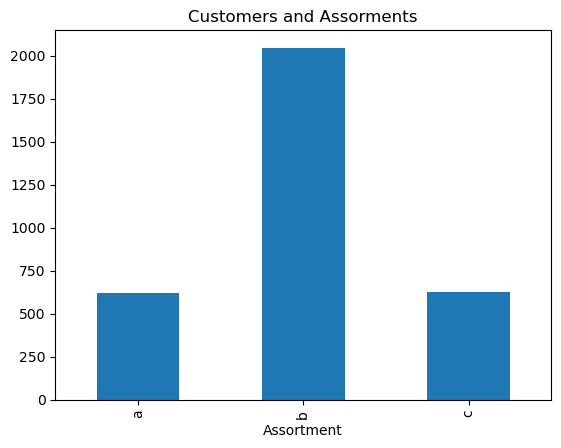

In [27]:
#Determining how Assortment affects the Customers
new = df_train_store.groupby(by=['Assortment'])['Customers'].mean()
new.head()
#Visualize how Customers vary according to assortmentsisualize how Customers vary according to assortments
#Plotting a bar chart to
new.plot(kind='bar',title='Customers and Assorments')
plt.show()

In [28]:
#There are 4 store types and 3 merchandise
df_store.groupby(['StoreType','Assortment']).Assortment.count()

StoreType  Assortment
a          a             381
           c             221
b          a               7
           b               9
           c               1
c          a              77
           c              71
d          a             128
           c             220
Name: Assortment, dtype: int64

Rossmann operates mostly in Germany where stores are typically closed on Sundays.

Of all the four store types, only Store Type 'b' opens on Sundays.

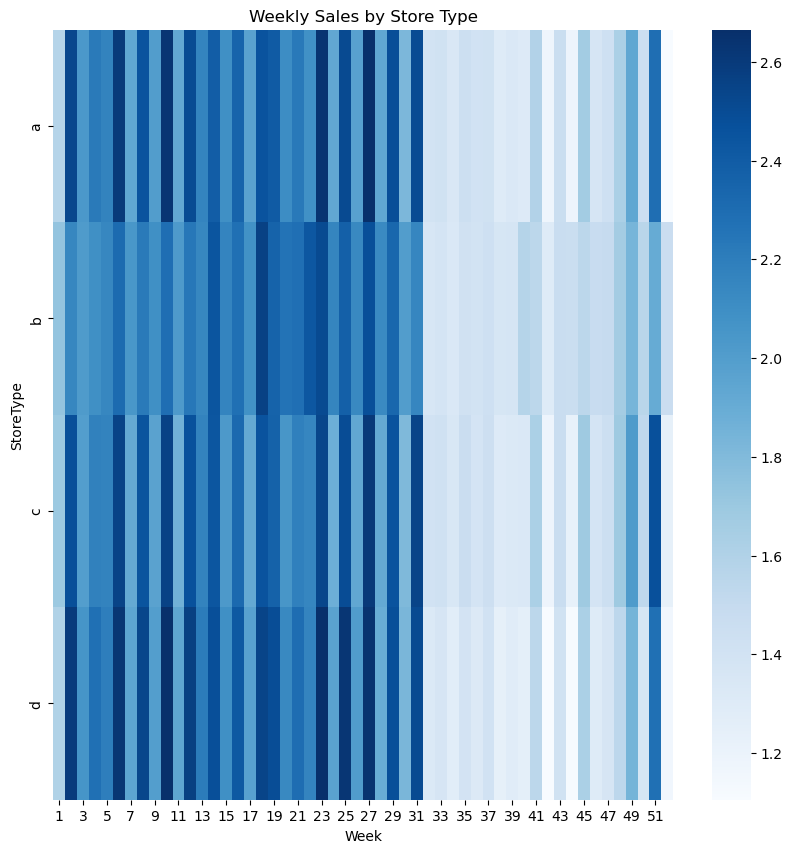

In [29]:
store_open=df_train_store[(df_train_store.Open==1)]

saledaystype=store_open.groupby(['StoreType','Week']).sum()['Sales'].groupby(level=0).apply(lambda x:100*x/x.sum()).unstack()
plt.figure(figsize=(10,10))

sns.heatmap(saledaystype,cmap='Blues').set_title( 'Weekly Sales by Store Type')
plt.show()

In [30]:
# Checking the data when the store is closed 
store_closed = df_train_store[(df_train_store.Open == 0)]
store_closed.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalesperCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
291,292,5,0,0,0,1,0,1,2015,7,...,NaN,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
875,876,5,0,0,0,1,0,1,2015,7,...,NaN,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,"Feb,May,Aug,Nov"
1406,292,4,0,0,0,1,0,1,2015,7,...,NaN,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
1990,876,4,0,0,0,1,0,1,2015,7,...,NaN,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,"Feb,May,Aug,Nov"
2521,292,3,0,0,0,1,0,1,2015,7,...,NaN,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


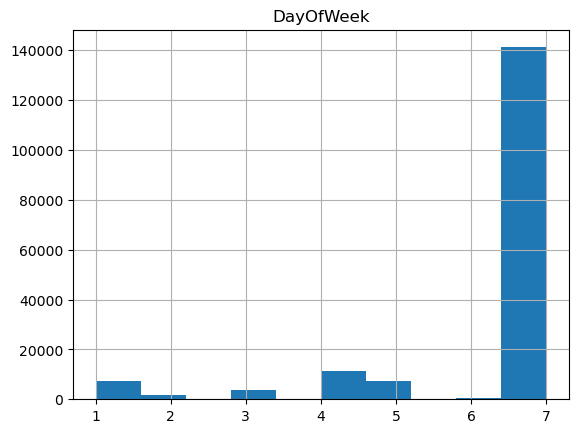

In [31]:
store_closed.hist('DayOfWeek')
plt.show()

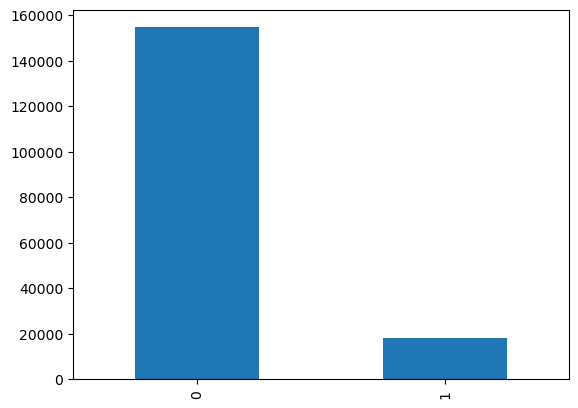

In [34]:
# Check whether there school was closed for holyday 
store_closed['SchoolHoliday'].value_counts().plot(kind='bar')
plt.show()

Here, 1 is school closed day and it pretty low. And 0 is None

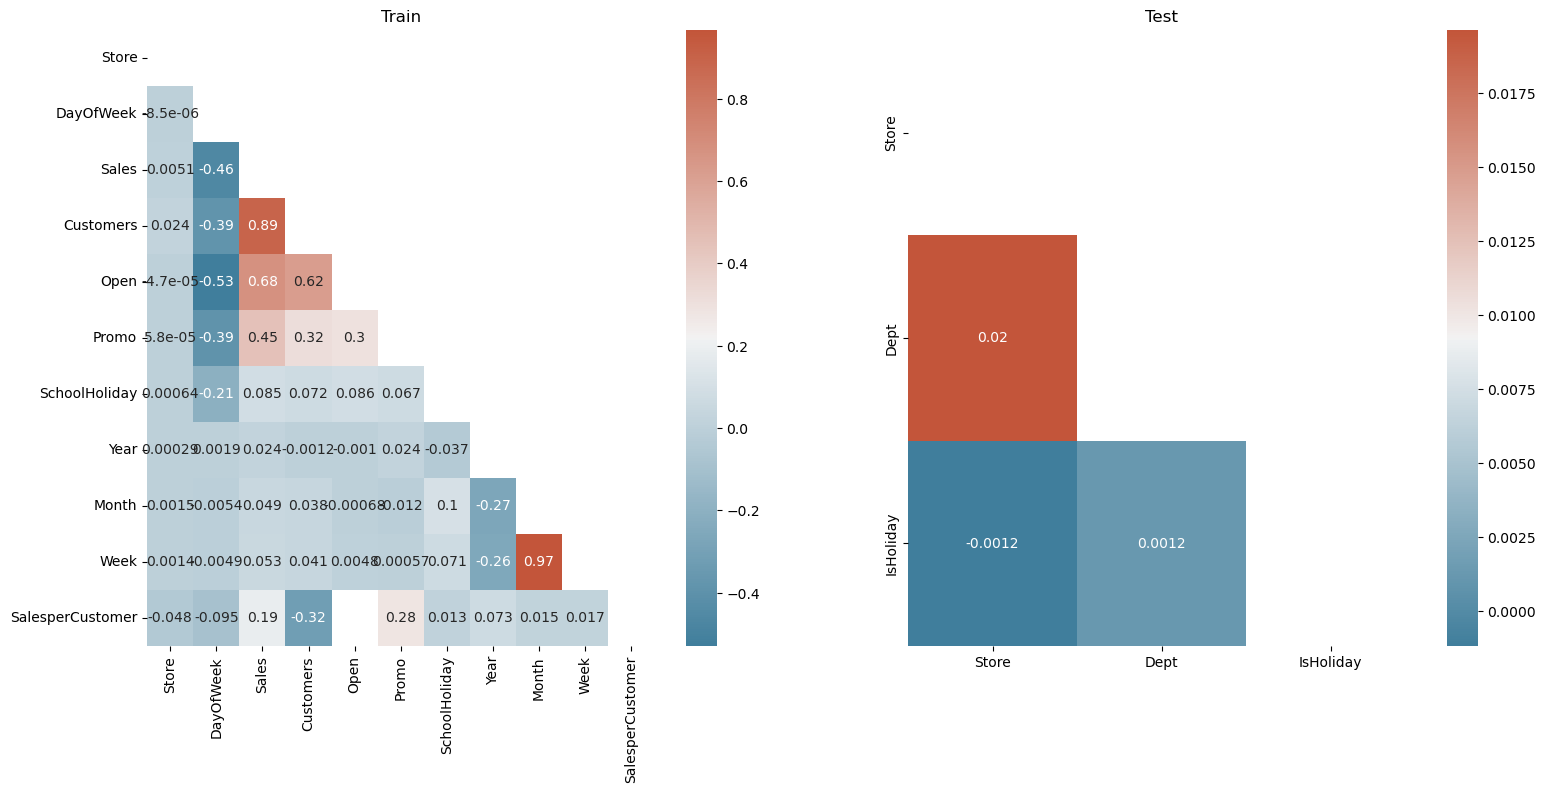

In [36]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df_train.corr(), mask=mask, cmap=cmap, annot=True, ax=ax1)
ax1.set_title('Train')
corr = df_test.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df_test.corr(), mask=mask, cmap=cmap, annot=True, ax=ax2)
ax2.set_title('Test')
plt.show()

Sales are highly correlated with feature Customers and feature Open and moderately correlated with Promo


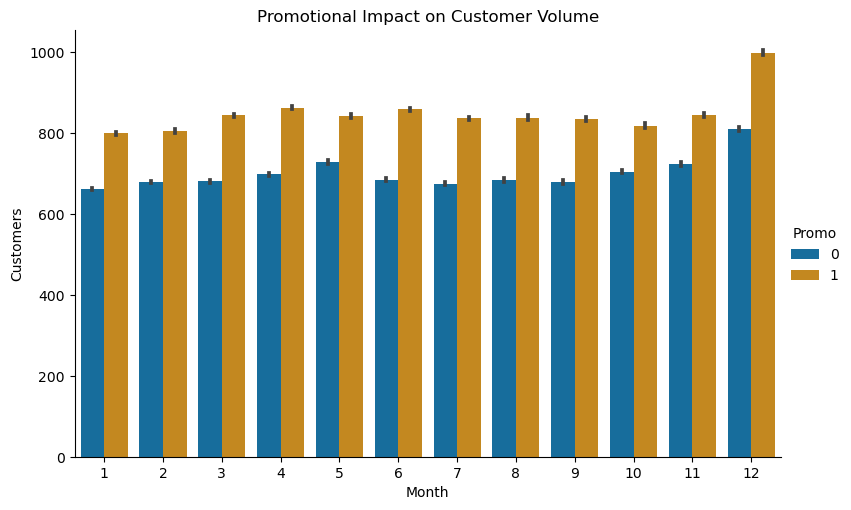

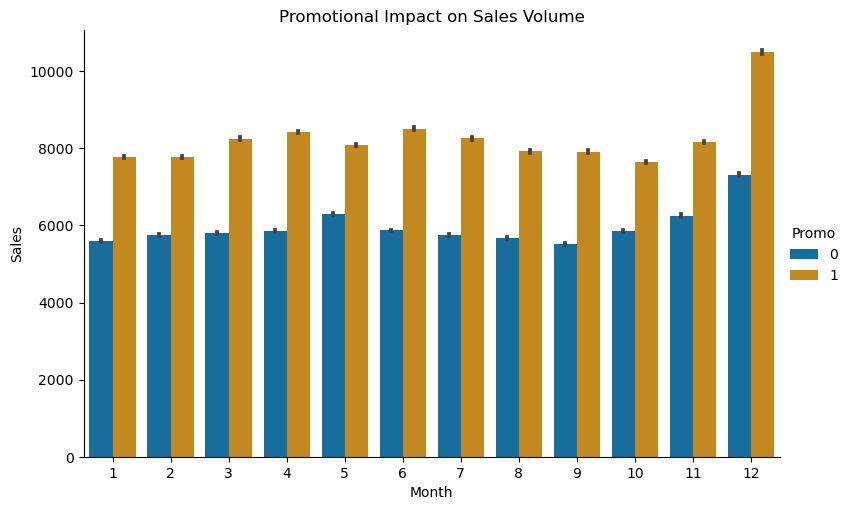

In [37]:
#Overall, promotional events provide lift to both customer and sales volume. The impact is most noticeable during the month of December 
#which is when consumers shop for Christmas and New Year.
#Promotional events provide a lift of less than 1.50€ on the average purchase basket of each customer for most months except December.
sns.catplot(data=store_open,x='Month',y='Customers',palette='colorblind',hue='Promo',kind='bar',height=5,
           aspect=8/5)
plt.title('Promotional Impact on Customer Volume')

sns.catplot(data=store_open, x='Month',y='Sales',palette='colorblind',hue='Promo',kind='bar',height=5,
           aspect=8/5)

plt.title('Promotional Impact on Sales Volume')
plt.show()


In [38]:
##Compared to other store types, customer behaviour at Store Type 'b' is the least sensitive to promotional events.

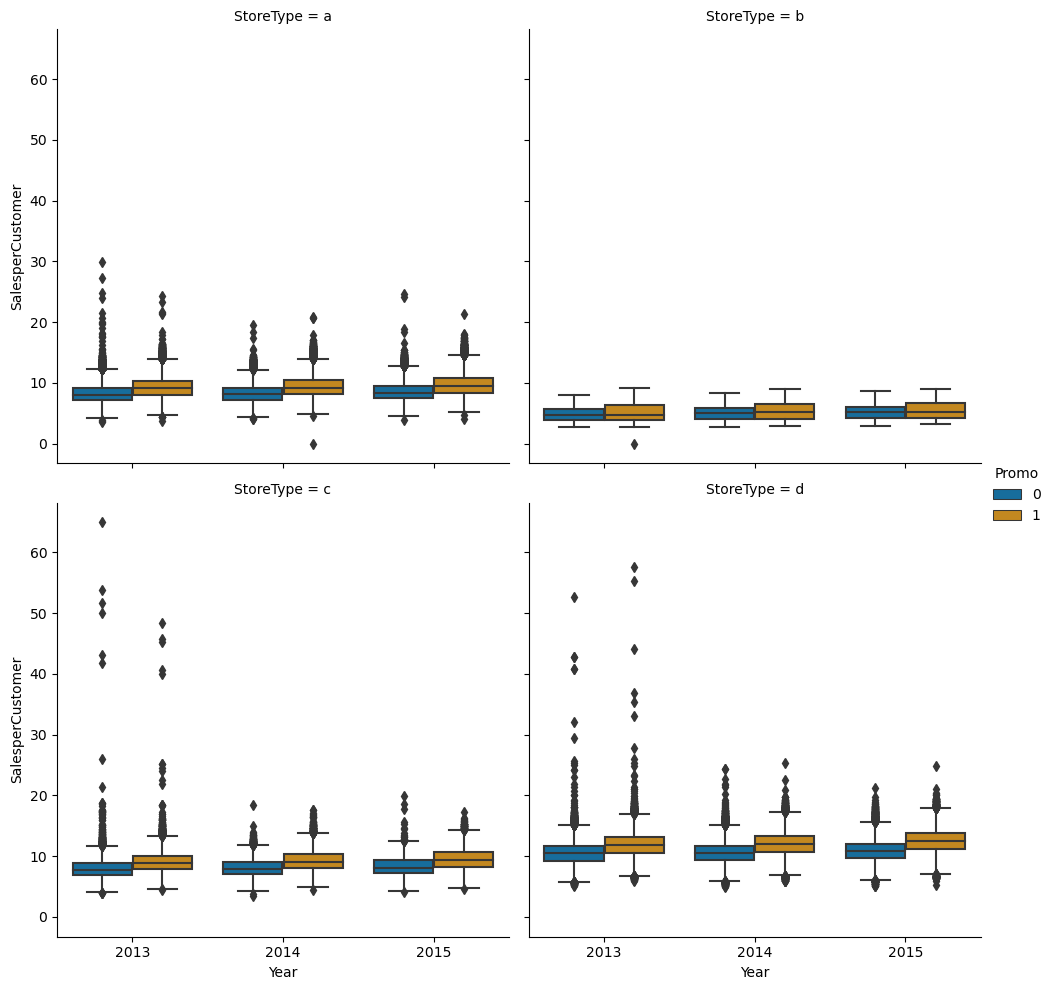

In [39]:
sns.catplot(data=store_open,x='Year',y='SalesperCustomer',col='StoreType',col_order=['a','b','c','d'],
            hue='Promo',palette='colorblind',col_wrap=2, kind='box')
plt.show()

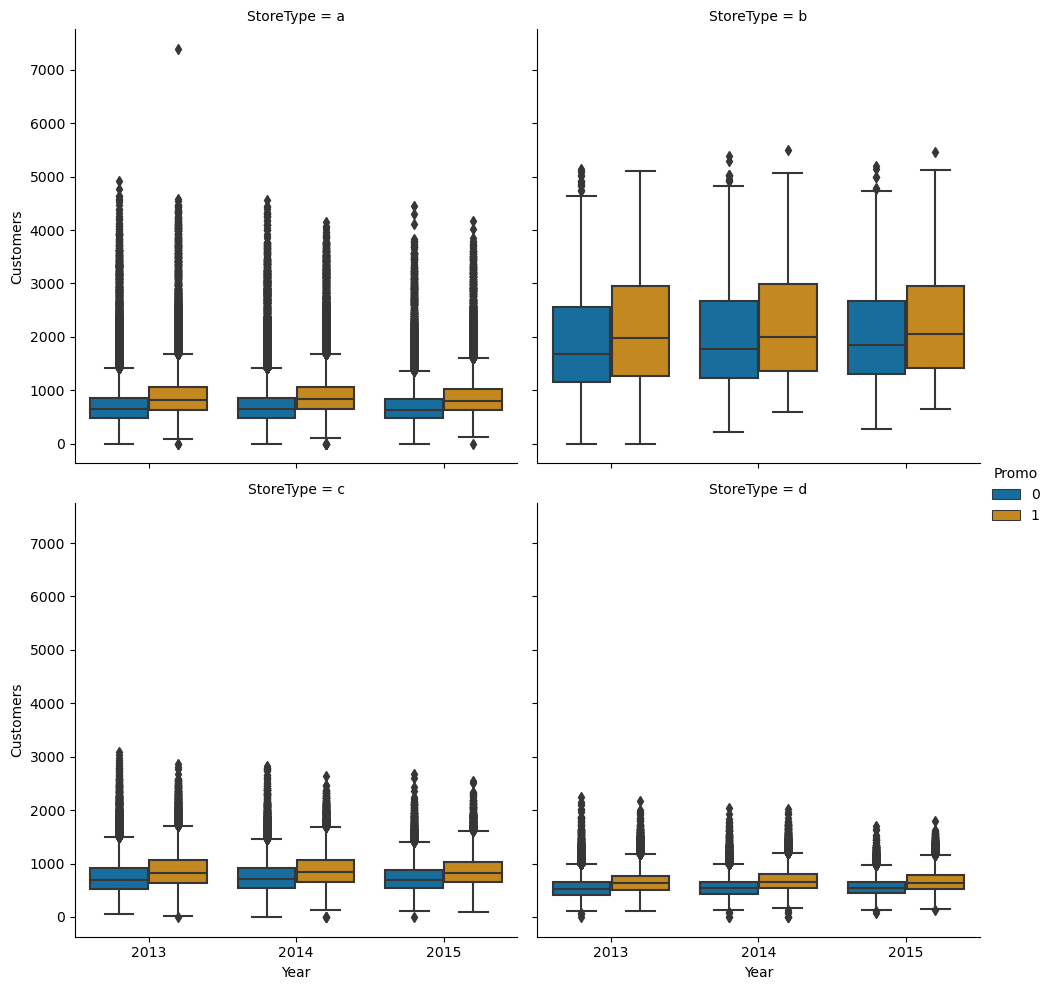

In [40]:
sns.catplot(data=store_open,x='Year',y='Customers',col='StoreType',col_order=['a','b','c','d'],
            hue='Promo',palette='colorblind',col_wrap=2,kind='box')
plt.show()

Customer base at Store Type 'b' with merchandise allocation 'b' are more likely to visit the stores just for specific promotional items and leave without buying anything else if those items weren't available. For the majority of its customer base, promotional events provide negligible lift to the average spending per person.

Some customers at Store Type 'a' with merchandise allocation 'a' exhibit similar tendency, ie target only specific promotional items. But overall, most will still increase the size of their purchase basket during a promotional event.

Customers at Store Type 'c' and 'd' are more sensitive to promotional events.

In [41]:
store_open.groupby(['StoreType','Promo','Assortment']).SalesperCustomer.describe()

count       mean       std       min  \
StoreType Promo Assortment                                            
a         0     a           157775.0   8.245818  1.465991  3.635389   
                c            94757.0   8.545174  1.533253  4.151235   
          1     a           128254.0   9.355252  1.694059  0.000000   
                c            76257.0   9.606742  1.752278  4.132372   
b         0     a             3963.0   6.004593  0.736876  3.801695   
                b             5077.0   4.168919  0.674202  2.749075   
                c              582.0   5.568012  0.439001  4.289030   
          1     a             2446.0   6.733681  0.780860  4.143487   
                b             3133.0   4.153980  0.550337  0.000000   
                c              360.0   6.079790  0.374720  4.993193   
c         0     a            32268.0   7.739291  1.289794  3.382542   
                c            29967.0   8.489280  1.565809  4.095064   
          1     a            26286.0   8.894304  1.498498  4.448854   
                c            24447.0   9.676534  1.846214  4.686770   
d         0     a            51961.0  10.330576  1.593431  5.583333   
                c            91113.0  10.753989  1.801801  4.881279   
          1     a            41923.0  11.942236  1.838369  6.419786   
                c            73771.0  12.214557  2.020652  5.191489   

                                  25%        50%        75%        max  
StoreType Promo Assortment                                              
a         0     a            7.184426   8.062185   9.121190  29.877551  
                c            7.392801   8.388406   9.570332  24.143521  
          1     a            8.095807   9.141828  10.386396  24.352234  
                c            8.307203   9.445633  10.778080  18.067485  
b         0     a            5.458164   5.962480   6.556883   8.642473  
                b            3.681765   4.061713   4.555769   7.367793  
                c            5.298290   5.521871   5.806864   7.206720  
          1     a            6.152392   6.715897   7.288416   9.203528  
                b            3.776053   4.102865   4.494137   6.942342  
                c            5.812964   6.075476   6.299934   7.722051  
c         0     a            6.832583   7.588140   8.503000  19.916784  
                c            7.376110   8.354905   9.473299  64.957854  
          1     a            7.859049   8.738441   9.793758  21.919866  
                c            8.334942   9.514388  10.906227  48.381148  
d         0     a            9.297175  10.325250  11.389610  52.734737  
                c            9.448370  10.702128  11.930348  24.292722  
          1     a           10.759235  11.959459  13.152529  57.614983  
                c           10.783823  12.180952  13.572871  25.358779

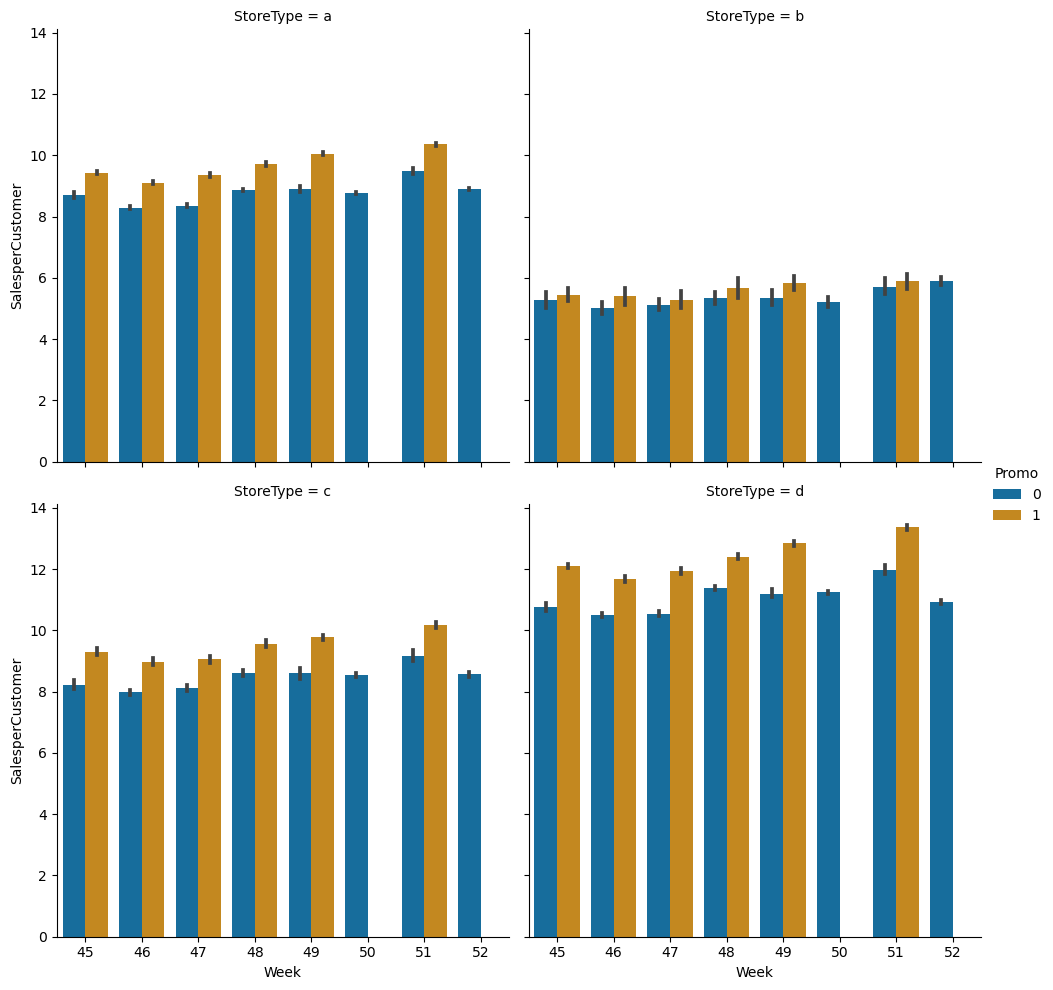

In [42]:
data=store_open[(store_open.Week>44)]
sns.catplot(data=data,x='Week',y='SalesperCustomer',col='StoreType',col_order=['a','b','c','d'],
            hue='Promo',color='StateHoliday',palette='colorblind', col_wrap=2,kind='bar')
plt.show()

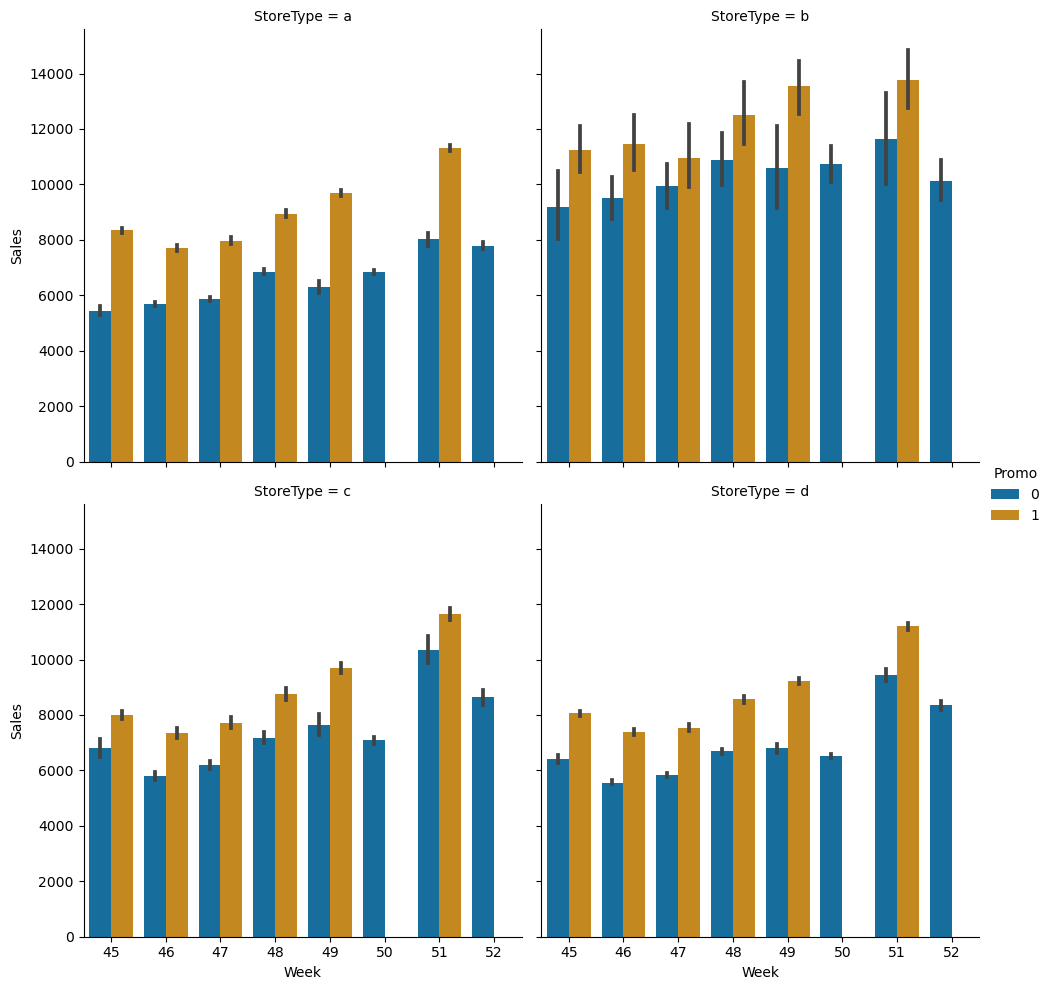

In [43]:
sns.catplot(data=data,x='Week',y='Sales',col='StoreType',col_order=['a','b','c','d'],
            hue='Promo',color='StateHoliday',palette='colorblind',col_wrap=2, kind='bar')
plt.show()

/Users/amanmanocha/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


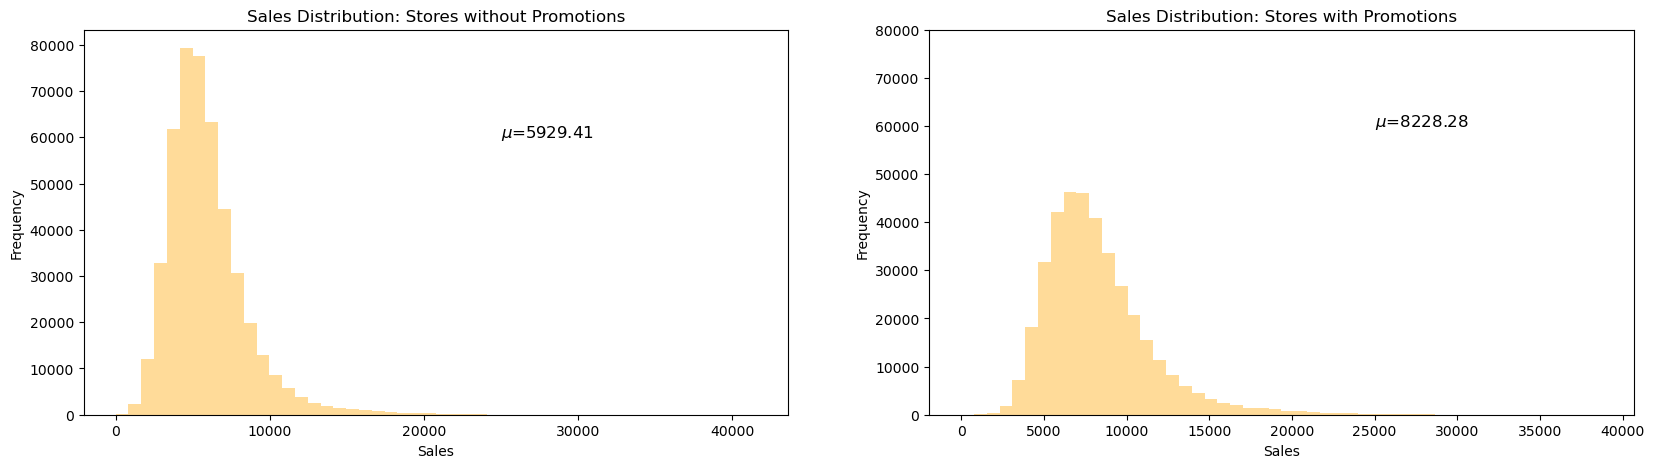

In [44]:
#It appears that promotions do provide a lift to 
#sales.  Let's test to see if this is really the
#case and not due to chance market fluctuation.

df_promo=store_open[(store_open.Promo==1)]
df_nopromo=store_open[(store_open.Promo==0)]

#Look at the distribution of sales
f,axes=plt.subplots(ncols=2,figsize=(20,5))

sns.distplot(df_nopromo['Sales'],kde=False, color='orange',ax=axes[0])
axes[0].set_ylabel('Frequency')
axes[0].text(25000, 60000, r'$\mu$='+str(round(df_nopromo['Sales'].mean(),2)), 
         fontsize=12)
axes[0].set_title('Sales Distribution: Stores without Promotions')

sns.distplot(df_promo['Sales'],kde=False, color='orange',ax=axes[1])
axes[1].set_ylabel('Frequency')
axes[1].set_ylim([0,80000])
axes[1].text(25000,60000,r'$\mu$='+str(round(df_promo['Sales'].mean(),2)),
             fontsize=12)
axes[1].set_title('Sales Distribution: Stores with Promotions')

plt.show()

In [45]:
df_nopromo.Sales.describe()

count    467496.000000
mean       5929.407603
std        2629.648385
min           0.000000
25%        4242.000000
50%        5459.000000
75%        7004.000000
max       41551.000000
Name: Sales, dtype: float64

In [46]:
df_promo.Sales.describe()

count    376896.000000
mean       8228.281239
std        3175.759157
min           0.000000
25%        6069.000000
50%        7649.000000
75%        9686.000000
max       38722.000000
Name: Sales, dtype: float64

In [47]:
#Sales are not normally distributed but sample size is large.  Consider one-way ANOVA as it is a fairly robust test against normality assumption.
#H0: Means are equal (Promotions have no effect)
#H1: Means are not equal (Promotions have effect)

stat,p = f_oneway(df_nopromo.Sales,df_promo.Sales)
print('Statistic= %.3f, p= %.3f'%(stat,p))

#Interpret
alpha=0.05
if p>alpha:
    print('Cannot reject H0, i.e. means are not significantly different')
else:
    print('Reject H0, i.e. means are different.')

Statistic= 132382.948, p= 0.000
Reject H0, i.e. means are different.


In [57]:
#Applying Log Transformation of the Target Variable
X = df_train_store.drop(['Sales','Customers'],1)
#Transform Target Variable
y = np.log(df_train_store['Sales']+1)

from sklearn.model_selection import train_test_split
X_train , X_val , y_train , y_val = train_test_split(X , y , test_size=0.30 , random_state = 1 )

X_train.shape , X_val.shape , y_train.shape , y_val.shape

<ipython-input-57-e83fc2027507>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df_train_store.drop(['Sales','Customers'],1)


((712046, 19), (305163, 19), (712046,), (305163,))

In [58]:
df_train_store= df_train_store.replace(r'^\s*$', np.nan, regex=True)


In [59]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=11)
dt.fit(X_train , y_train)
y_pred_dt = dt.predict(X_val)

ValueError: could not convert string to float: 'b'

In [51]:
from sklearn.metrics import r2_score , mean_squared_error

print(r2_score(y_val , y_pred_dt))
print(np.sqrt(mean_squared_error(y_val , y_pred_dt)))

NameError: name 'y_pred_dt' is not defined

In [52]:
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def rmspe(y, yhat):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe

In [53]:
rmspe(y_val,y_pred_dt)

NameError: name 'y_pred_dt' is not defined

RANDOM FOREST

In [55]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 15)
rf.fit(X_train, y_train)

ValueError: could not convert string to float: 'b'

In [56]:
from sklearn.metrics import accuracy_score


y_pred = rf.predict(X_test)
error = (RMSPE(y_test,y_pred))
error
print("RMSPE of Random Forest %",error * 100)

#top 10 features of Random Forest
feat_importances_rf = pd.Series(rf.feature_importances_, index=colnames)
feat_importances_rf.nlargest(10).sort_values(ascending = True).plot(kind='barh')
plt.xlabel('importance')
plt.title('Feature Importance in Random Forest')

NameError: name 'X_test' is not defined